# Problem 1: Descriptive Statistics and Probability Theory: Real Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [2]:
df = pd.read_excel('../data/ceo.xls')


print("Dataset shape:", df.shape)
df.head()

Dataset shape: (447, 8)


,salary,totcomp,tenure,age,sales,profits,assets,Unnamed: 7
0,3030,8138,7,61,161315.0,2956.0,257389.0,NaN
1,6050,14530,0,51,144416.0,22071.0,237545.0,NaN
2,3571,7433,11,63,139208.0,4430.0,49271.0,NaN
3,3300,13464,6,60,100697.0,6370.0,92630.0,NaN
4,10000,68285,18,63,100469.0,9296.0,355935.0,NaN


In [3]:
print("Dataset information (is there any NaNs):")
df.info()

Dataset information (is there any NaNs):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   salary      447 non-null    int64  
 1   totcomp     447 non-null    int64  
 2   tenure      447 non-null    int64  
 3   age         447 non-null    int64  
 4   sales       447 non-null    float64
 5   profits     447 non-null    float64
 6   assets      447 non-null    float64
 7   Unnamed: 7  2 non-null      object 
dtypes: float64(3), int64(4), object(1)
memory usage: 28.1+ KB


## 1(a) Location Measures for Total Compensation

In [4]:
totcomp = df['totcomp'].dropna()

mean_val = totcomp.mean()
trimmed_mean = stats.trim_mean(totcomp, 0.05)
median_val = totcomp.median()
q1 = totcomp.quantile(0.25)
q3 = totcomp.quantile(0.75)
q05 = totcomp.quantile(0.05)
q95 = totcomp.quantile(0.95)

print(f"Mean: ${mean_val:,.2f}")
print(f"5%-Trimmed Mean: ${trimmed_mean:,.2f}")
print(f"Median (Q2): ${median_val:,.2f}")
print(f"Lower Quartile (Q1): ${q1:,.2f}")
print(f"Upper Quartile (Q3): ${q3:,.2f}")
print(f"Lower 5% Quantile: ${q05:,.2f}")
print(f"Upper 95% Quantile: ${q95:,.2f}")

Mean: $8,340.06
5%-Trimmed Mean: $4,637.68
Median (Q2): $2,951.00
Lower Quartile (Q1): $1,575.50
Upper Quartile (Q3): $6,043.00
Lower 5% Quantile: $783.70
Upper 95% Quantile: $24,563.30


### Economic Interpretation:

**Mean**: The average CEO total compensation represents the typical compensation if wealth were distributed equally. However, it's sensitive to extreme values (outliers).

**5%-Trimmed Mean**: By removing the top and bottom 5%, this measure provides a robust average less influenced by extreme compensations, better representing the "typical" CEO compensation.

**Median**: Half of CEOs earn below this value and half above. It's the most representative measure for skewed distributions and shows the compensation of the "middle" CEO.

**Lower Quartile (Q1)**: 25% of CEOs earn less than this amount, representing the threshold for the lower-paid quarter of executives.

**Upper Quartile (Q3)**: 75% of CEOs earn below this value; only the top 25% earn more, indicating the entry point for high-earner CEOs.

**5% Quantile**: Only 5% of CEOs earn below this threshold, representing near-minimum compensation levels.

**95% Quantile**: Only 5% of CEOs earn above this value, indicating exceptionally high compensation packages.

## 1(b) Empirical Cumulative Distribution Function

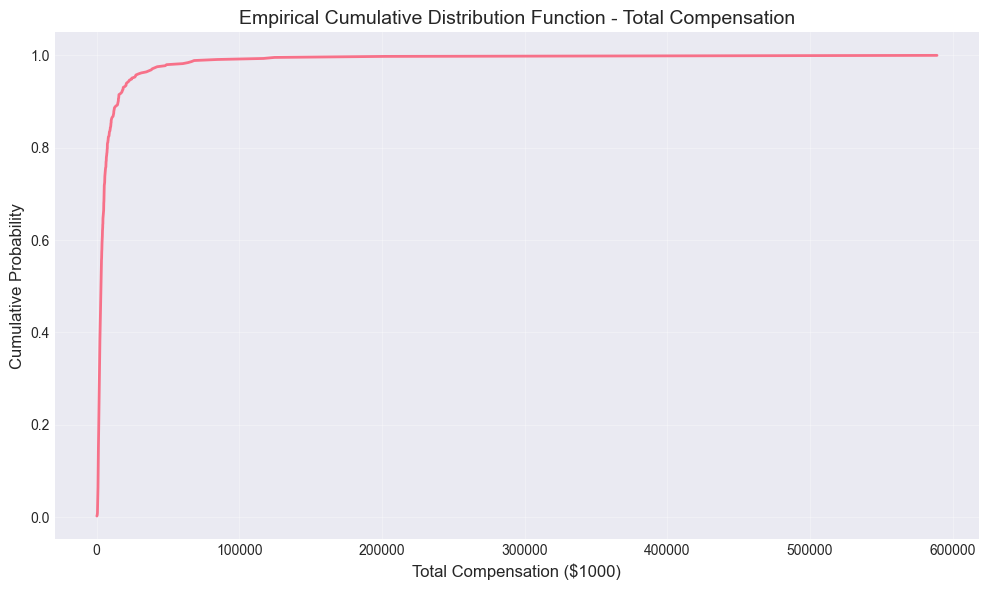

In [ ]:
sorted_totcomp = np.sort(totcomp)
ecdf_values = np.arange(1, len(sorted_totcomp) + 1) / len(sorted_totcomp)

plt.figure(figsize=(10, 6))
plt.plot(sorted_totcomp, ecdf_values, linewidth=2)
plt.xlabel('Total Compensation ($)', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)
plt.title('Empirical Cumulative Distribution Function - Total Compensation', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
f_inv_01 = totcomp.quantile(0.1)
f_inv_09 = totcomp.quantile(0.9)

f_2000 = (totcomp <= 2000).mean()
one_minus_f_4000 = (totcomp > 4000).mean()

print(f"F_hat_inv(0.1): ${f_inv_01:,.2f}")
print(f"F_hat_inv(0.9): ${f_inv_09:,.2f}")
print(f"\nF_hat(2000): {f_2000:.4f} ({f_2000*100:.2f}%)")
print(f"1 - F_hat(4000): {one_minus_f_4000:.4f} ({one_minus_f_4000*100:.2f}%)")

F_hat_inv(0.1): $1,002.40
F_hat_inv(0.9): $15,046.00

F_hat(2000): 0.3445 (34.45%)
1 - F_hat(4000): 0.3848 (38.48%)


### Economic Interpretation:

$\hat{F}^{-1}(0.1)$: The 10th percentile shows that 10% of CEOs earn below this compensation level. This represents the lower-income threshold for CEO positions.

$\hat{F}^{-1}(0.9)$: The 90th percentile indicates that 90% of CEOs earn less than this amount. CEOs earning above this are in the top 10% of compensations.

$\hat{F}(2000)$: The proportion of CEOs earning $2 million or less. This helps understand market concentration at lower compensation levels.

$1 - \hat{F}(4000)$: The proportion of CEOs earning more than $4 million, indicating the prevalence of high-compensation packages in the sample.

## 1(c) Histogram and Box Plot

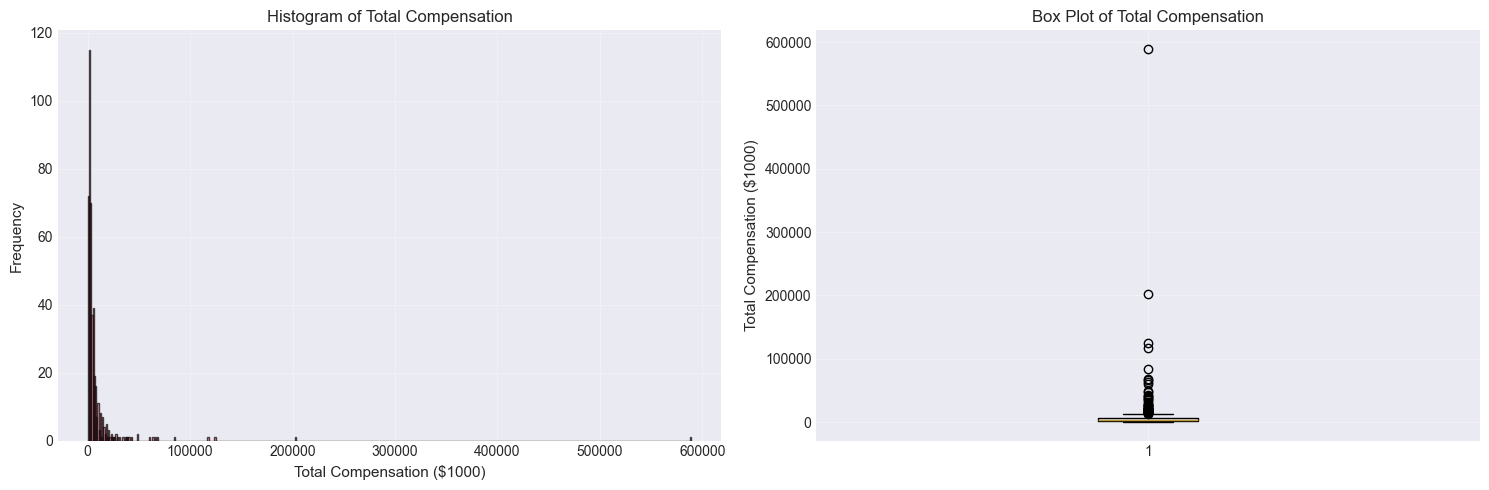

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(totcomp, bins='auto', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Total Compensation ($)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Histogram of Total Compensation', fontsize=12)
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(totcomp, vert=True)
axes[1].set_ylabel('Total Compensation ($)', fontsize=11)
axes[1].set_title('Box Plot of Total Compensation', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Interpretation:

**Histogram Area**: Each rectangle's area represents the proportion (or count) of observations within that bin interval. The total area under the histogram sums to the total number of observations (or 1 if normalized).

**Box Plot Components**:
- Bottom whisker: Minimum or 1.5×IQR below Q1
- Box bottom: Q1 (25th percentile - lower quartile)
- Line in box: Median (Q2, 50th percentile - median)
- Box top: Q3 (75th percentile - upper quartile)
- Top whisker: Maximum or 1.5×IQR above Q3
- Points beyond whiskers: Outliers

## 1(d) Distribution Analysis and Symmetry

In [15]:
skewness = totcomp.skew()
kurtosis = totcomp.kurtosis()
iqr = q3 - q1
std_dev = totcomp.std()

print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
print(f"IQR: ${iqr:,.2f}")
print(f"Standard Deviation: ${std_dev:,.2f}")
print(f"\nMean vs Median: ${mean_val:,.2f} vs ${median_val:,.2f}")
print(f"Difference: ${mean_val - median_val:,.2f}")

Skewness: 14.8464
Kurtosis: 261.3217
IQR: $4,467.50
Standard Deviation: $31,571.80

Mean vs Median: $8,340.06 vs $2,951.00
Difference: $5,389.06


### Conclusions:

The distribution shows strong positive skewness, indicating:
1. Most CEOs earn relatively moderate compensations
2. A small number receive exceptionally high packages (outliers)
3. The mean is pulled upward by these extreme values

**Appropriateness of Location Measures**:
- **Mean**: Less appropriate due to extreme sensitivity to outliers
- **Median**: Most appropriate - robust to outliers, better represents typical CEO
- **Trimmed mean**: Good compromise between robustness and using all data

The high positive skewness suggests we should primarily rely on median and quantiles rather than mean for understanding typical compensation.

## 1(e) Histogram Bandwidth Selection

Python/Matplotlib's (numpy=1.26) `auto` uses maximum bin width between the Sturges' Rule and Freedman-Diaconis method:

1. Sturges' Rule: `bins = ceil(log2(n) + 1)` \
   Simple but may not work well for non-normal distributions

2. Freedman-Diaconis: `bin_width = 2 * IQR / n^(1/3)` \
   More robust to outliers, adapts to data spread

In [19]:
n = len(totcomp)
sturges_bins = int(np.ceil(np.log2(n) + 1))
fd_bin_width = 2 * iqr / (n ** (1/3))
fd_bins = int(np.ceil((totcomp.max() - totcomp.min()) / fd_bin_width))

print(f"\nFor our data (n={n}):")
print(f"Sturges suggests: {sturges_bins} bins")
print(f"Freedman-Diaconis suggests: {fd_bins} bins")


For our data (n=447):
Sturges suggests: 10 bins
Freedman-Diaconis suggests: 505 bins


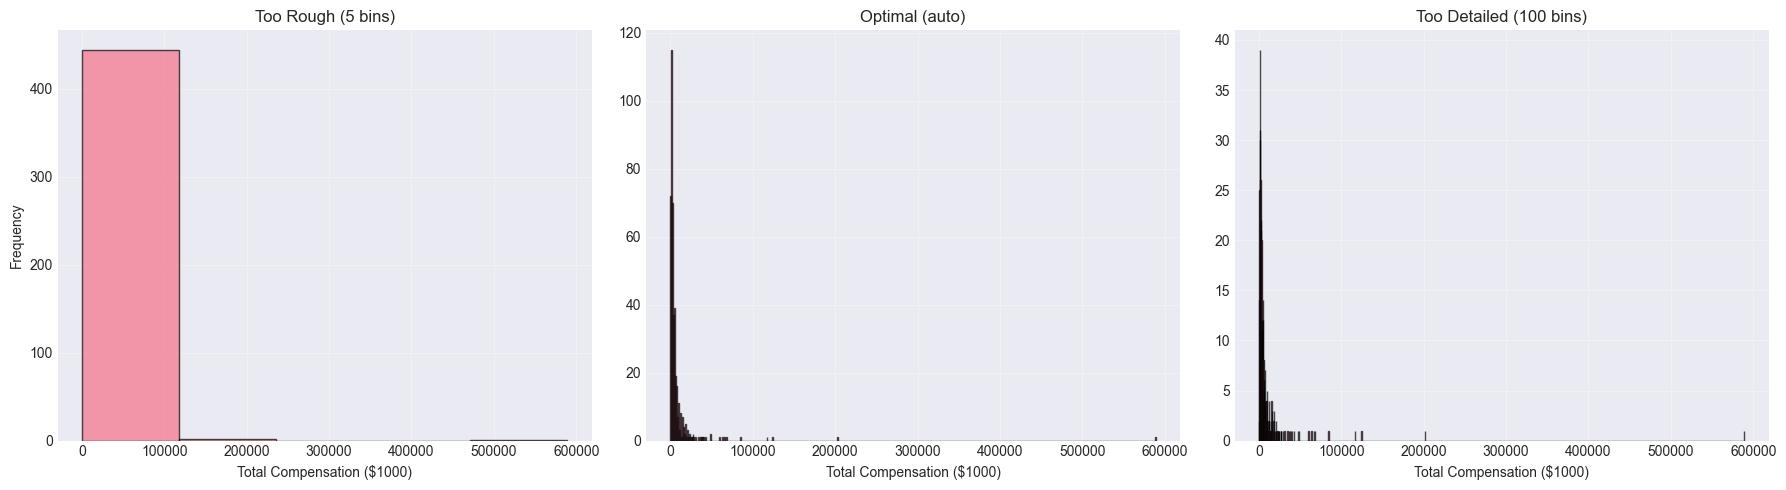

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(totcomp, bins=5, edgecolor='black', alpha=0.7)
axes[0].set_title('Too Rough (5 bins)', fontsize=12)
axes[0].set_xlabel('Total Compensation ($)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

axes[1].hist(totcomp, bins='auto', edgecolor='black', alpha=0.7)
axes[1].set_title('Optimal (auto)', fontsize=12)
axes[1].set_xlabel('Total Compensation ($)')
axes[1].grid(True, alpha=0.3)

axes[2].hist(totcomp, bins=2000, edgecolor='black', alpha=0.7)
axes[2].set_title('Too Detailed (100 bins)', fontsize=12)
axes[2].set_xlabel('Total Compensation ($)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Learnings:**
- TOO ROUGH: Loses important distribution features, over-smooths data
- OPTIMAL: Balances detail and clarity, reveals true distribution shape
- TOO DETAILED: Shows noise, makes interpretation difficult, irregular bars

## 1(f) Log Transformation

In [24]:
log_totcomp = np.log(totcomp)

log_mean = log_totcomp.mean()
log_median = log_totcomp.median()
log_skewness = log_totcomp.skew()

print(f"Original Mean: ${mean_val:,.2f}")
print(f"Original Median: ${median_val:,.2f}")
print(f"Original Skewness: {skewness:.4f}")
print(f"\nLog Mean: {log_mean:.4f}")
print(f"Log Median: {log_median:.4f}")
print(f"Log Skewness: {log_skewness:.4f}")
print(f"\nSkewness reduction: {abs(skewness - log_skewness):.4f}")

Original Mean: $8,340.06
Original Median: $2,951.00
Original Skewness: 14.8464

Log Mean: 8.1357
Log Median: 7.9899
Log Skewness: 0.8496

Skewness reduction: 13.9968


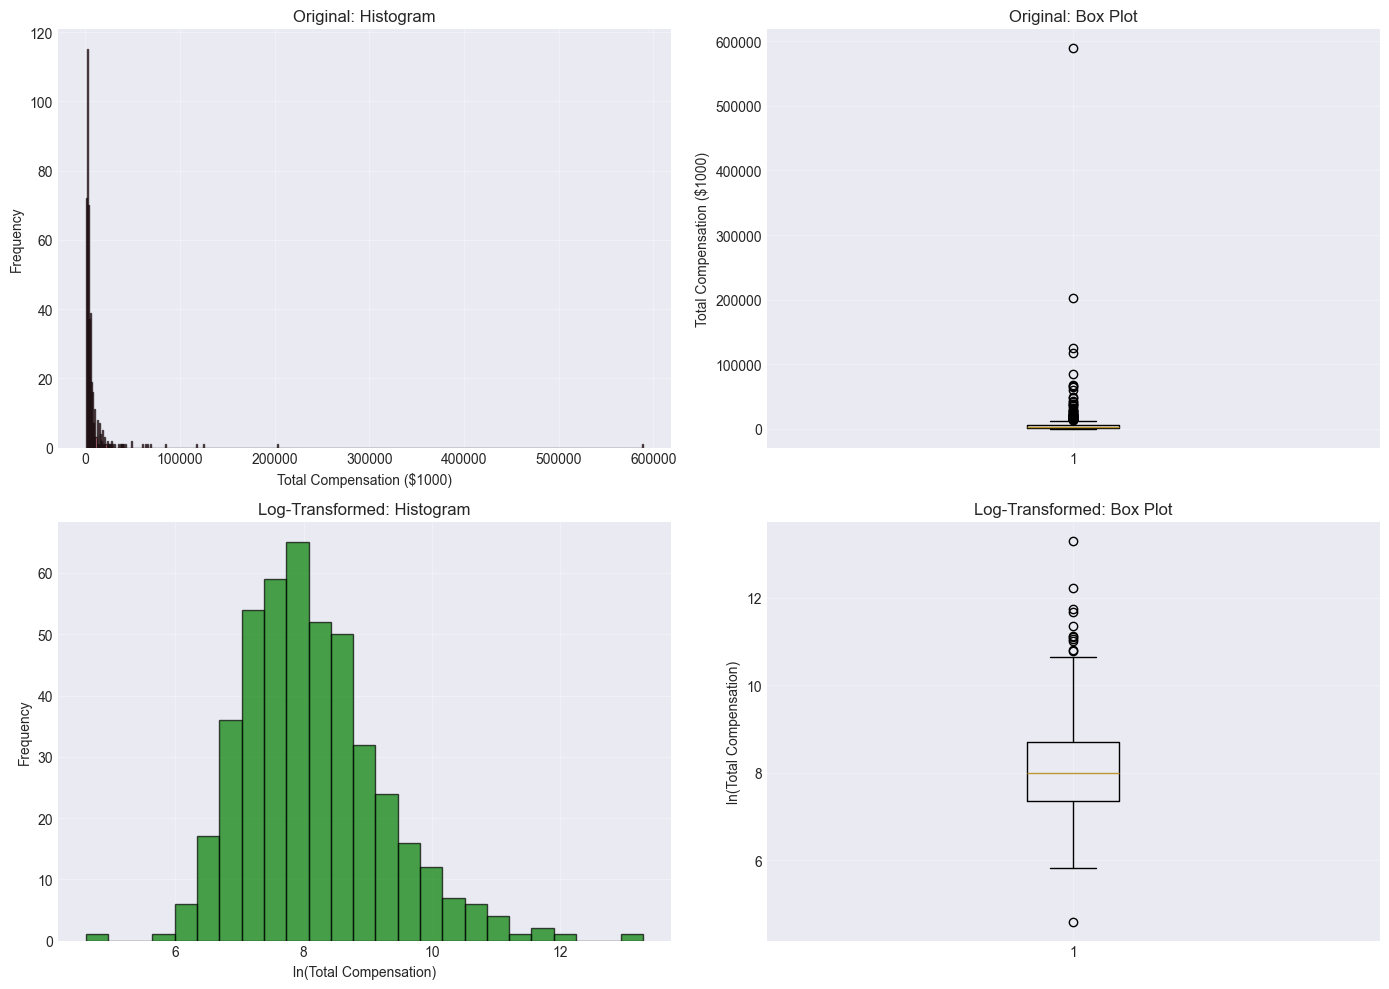

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(totcomp, bins='auto', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Original: Histogram', fontsize=12)
axes[0, 0].set_xlabel('Total Compensation ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].boxplot(totcomp, vert=True)
axes[0, 1].set_title('Original: Box Plot', fontsize=12)
axes[0, 1].set_ylabel('Total Compensation ($)')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(log_totcomp, bins='auto', edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_title('Log-Transformed: Histogram', fontsize=12)
axes[1, 0].set_xlabel('ln(Total Compensation)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].boxplot(log_totcomp, vert=True)
axes[1, 1].set_title('Log-Transformed: Box Plot', fontsize=12)
axes[1, 1].set_ylabel('ln(Total Compensation)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Economic Interpretation of Log Transformation:

**Why logarithms work**:
- Converts multiplicative relationships to additive ones
- Compresses the scale, reducing impact of extreme values
- Makes percentage changes interpretable as linear differences

**Key findings**:
1. The log-transformed distribution is much more symmetric
2. Mean and median become closer, indicating better balance
3. Outliers are less extreme on the log scale
4. The distribution approximates normality better

**Economic meaning**:
- Original scale: Dollar differences matter (e.g., $1M to $2M)
- Log scale: Proportional/percentage differences matter (e.g., doubling compensation)
- Log transformation suggests CEO compensation may follow a log-normal distribution, common in income data
- This implies that percentage changes in compensation are more consistent than absolute changes

## 2(a) Correlation Analysis - Pearson Correlation

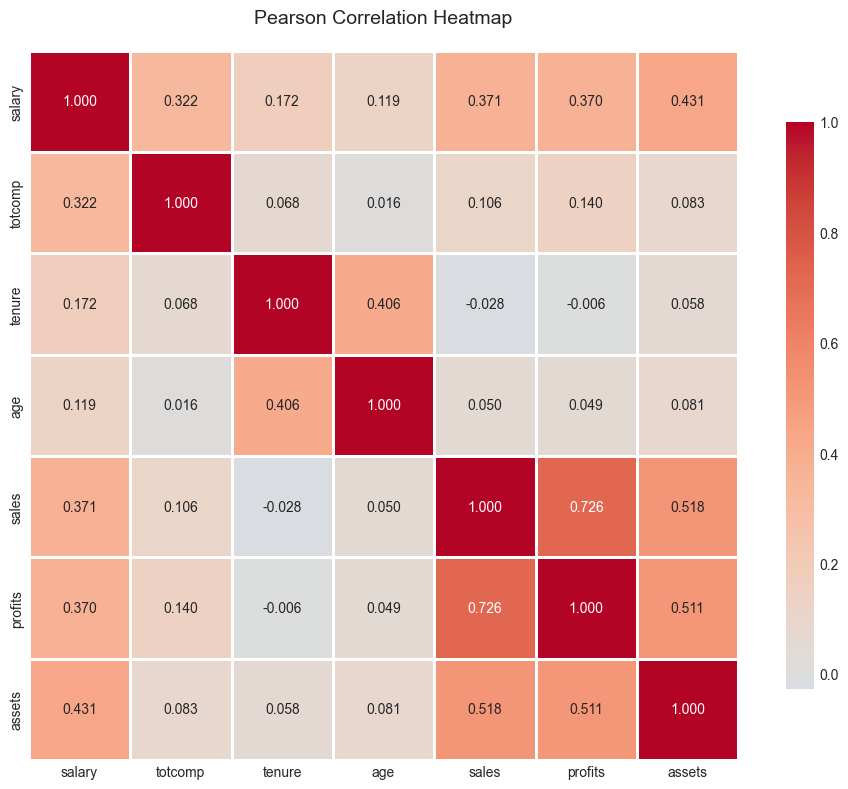

In [27]:
numeric_cols = ['salary', 'totcomp', 'tenure', 'age', 'sales', 'profits', 'assets']
df_numeric = df[numeric_cols].dropna()

pearson_corr = df_numeric.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Pearson Correlation Heatmap', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

### Discussion:

The Pearson correlation measures linear relationships between variables. Key observations:

#### Strong Positive Correlations:
1. **Sales & Profits (0.726)**: Strong positive relationship - companies with higher sales revenue tend to have higher profits, which is expected in business economics.

2. **Sales & Assets (0.518)**: Moderate-strong positive correlation - larger companies (by assets) generate more sales revenue.

3. **Profits & Assets (0.511)**: Moderate-strong positive correlation - companies with more assets tend to be more profitable.

#### Weak Correlations with Compensation:
1. **Salary & Totcomp (0.322)**: Surprisingly weak correlation, suggesting total compensation includes significant variable components beyond base salary (bonuses, stock options, etc.).

2. **Totcomp with firm metrics**: Very weak correlations with sales (0.106), profits (0.140), and assets (0.083) - this is somewhat surprising as we'd expect CEO pay to relate to company performance and size.

#### Personal Characteristics:
1. **Age & Tenure (0.406)**: Moderate positive correlation - older CEOs tend to have longer tenure, which makes intuitive sense.

2. **Age/Tenure with compensation**: Very weak correlations - CEO age and tenure are not strong predictors of total compensation.

### Key Insight:
The weak correlations between CEO compensation and company metrics (sales, profits, assets) suggest that CEO pay may be determined by factors not captured in this dataset (e.g., industry, board composition, individual negotiations, stock performance) or that the relationship is non-linear.

## 2(b) Scatter Plots and Spearman Correlation

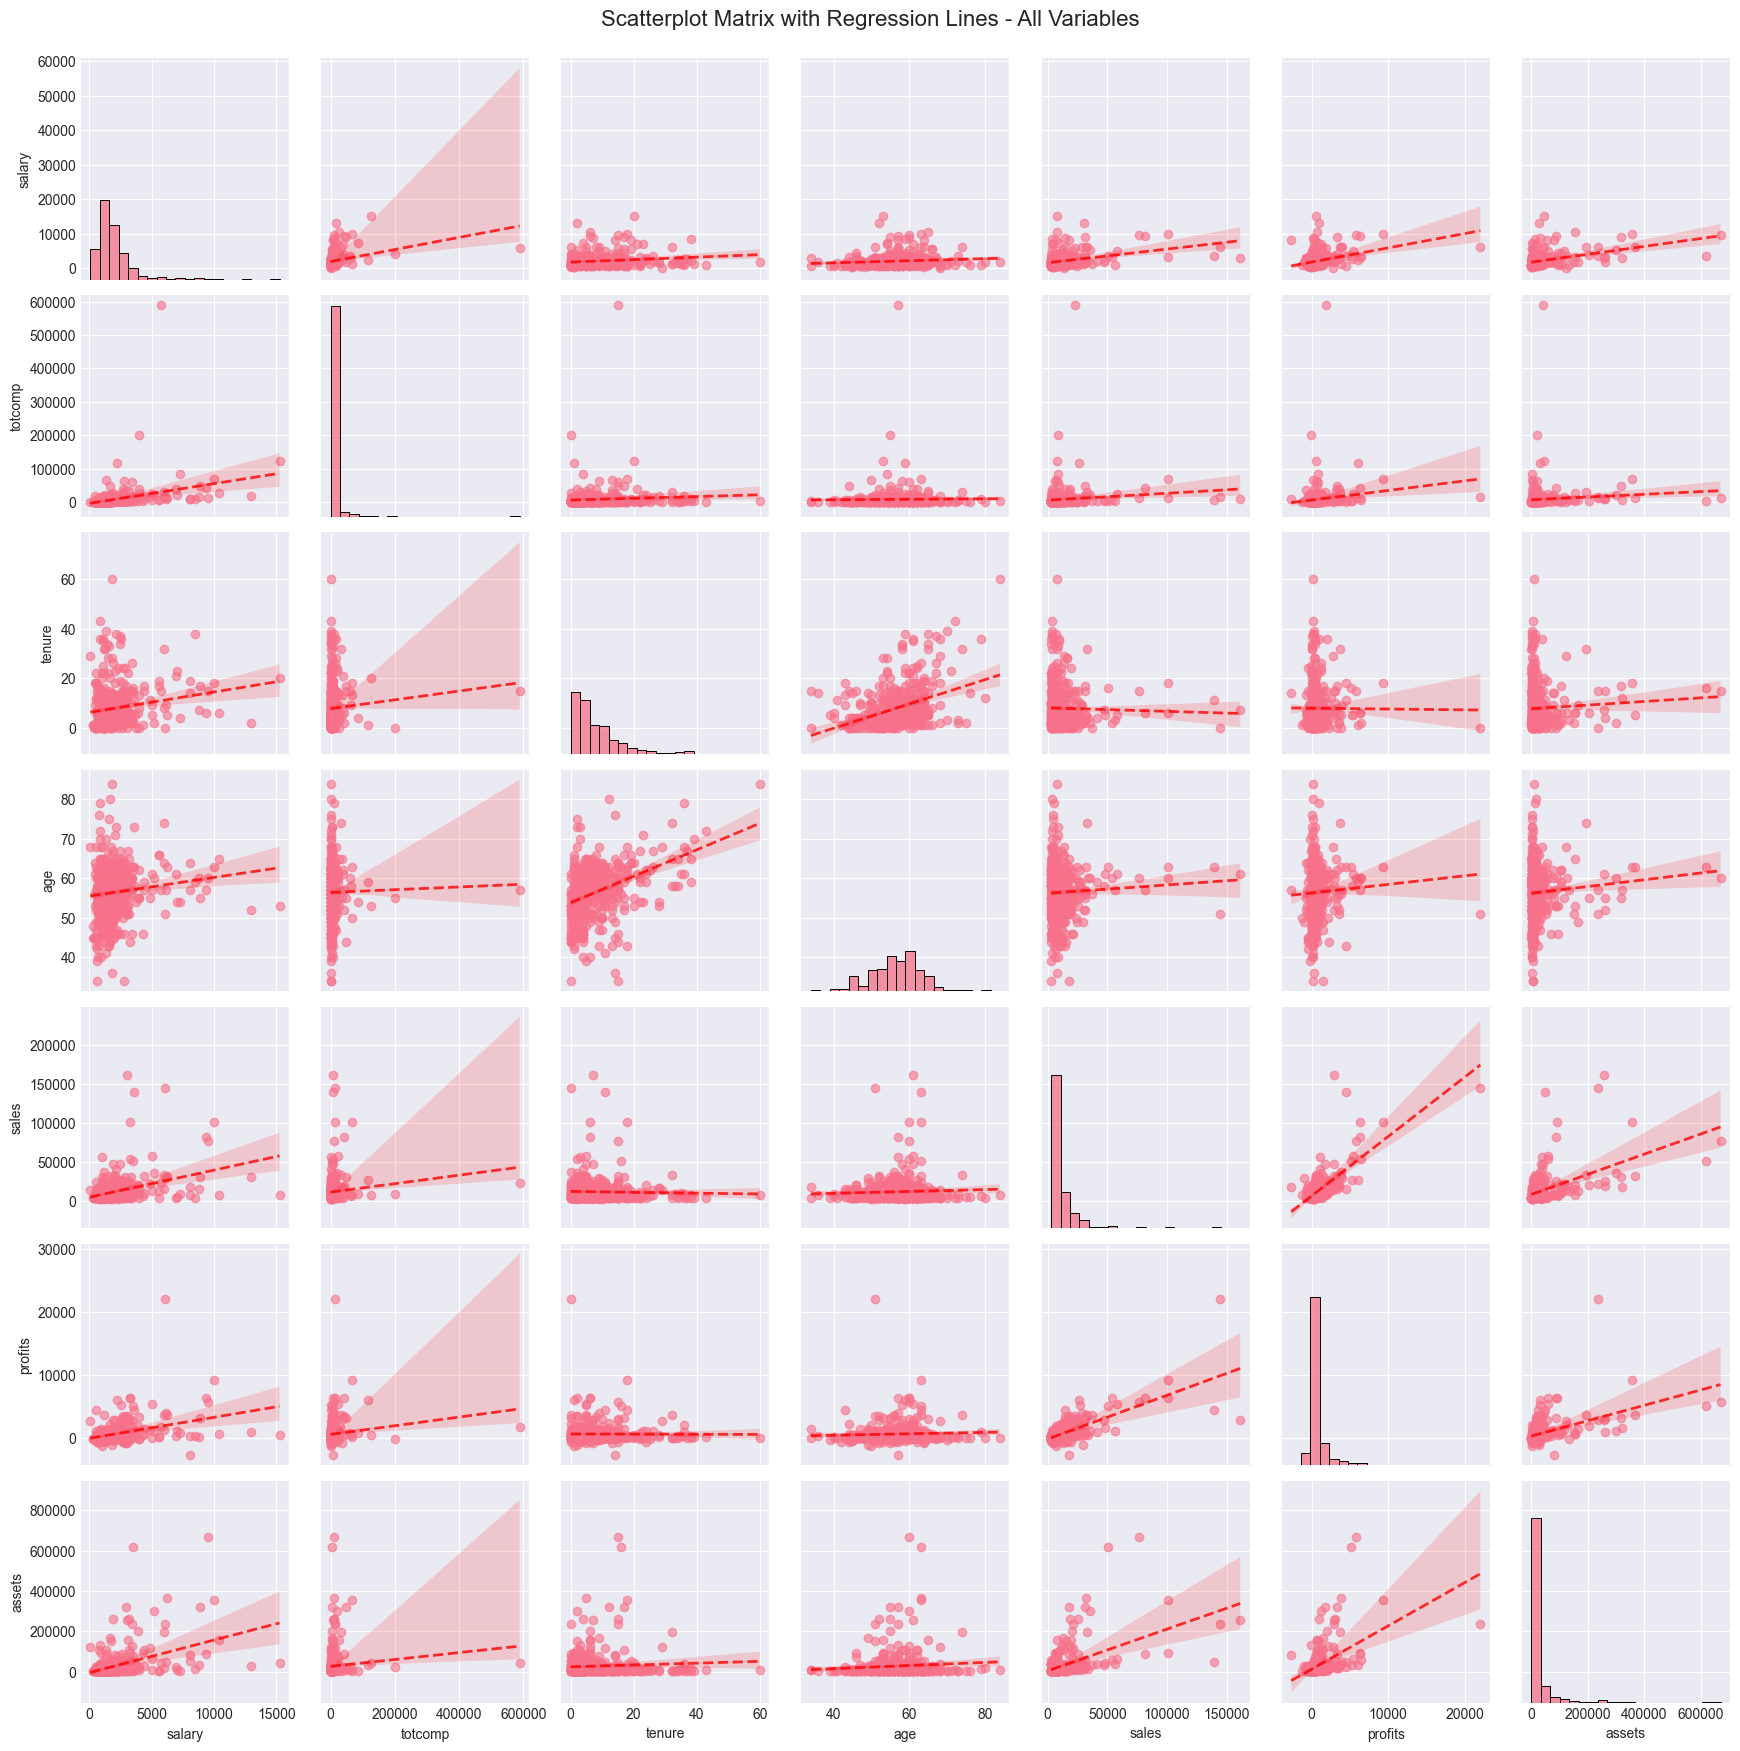

In [33]:
# Seaborn pairplot with regression lines
pairplot = sns.pairplot(df_numeric, diag_kind='hist', 
                        diag_kws={'edgecolor': 'black', 'bins': 20},
                        kind='reg',
                        plot_kws={'scatter_kws': {'alpha': 0.6}, 
                                  'line_kws': {'color': 'red', 'linestyle': '--', 
                                               'linewidth': 2, 'alpha': 0.8}},
                        height=2.5,
                        aspect=1)

pairplot.fig.suptitle('Scatterplot Matrix with Regression Lines - All Variables', 
                      fontsize=16, y=0.998)
plt.tight_layout()
plt.show()

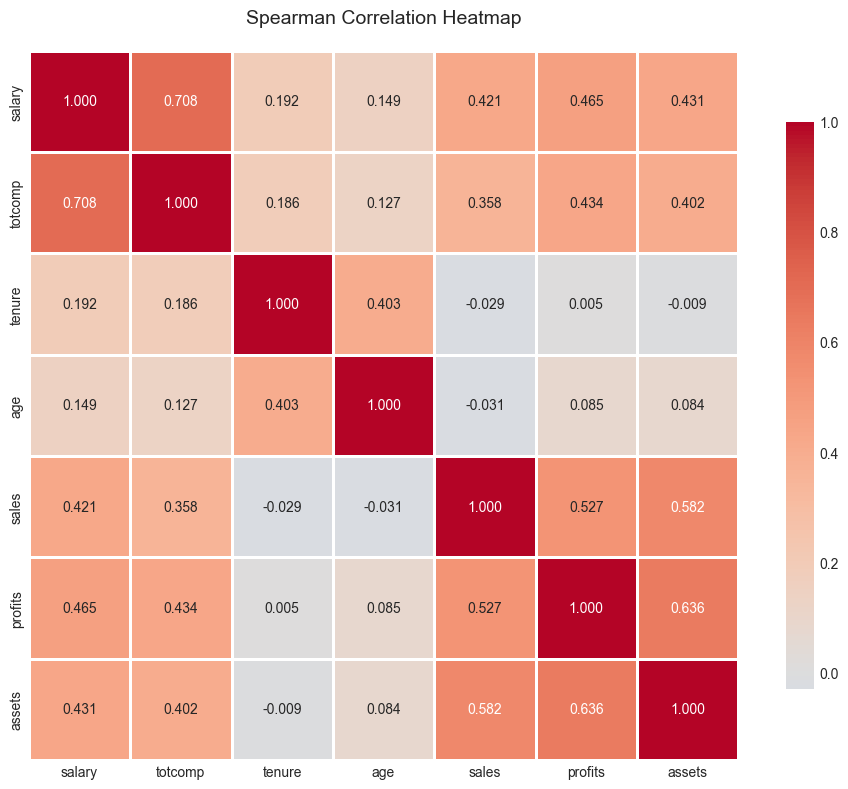

In [ ]:
spearman_corr = df_numeric.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Spearman Correlation Heatmap', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

### Comparison: Pearson vs Spearman Correlation

#### Major Differences (indicating non-linear relationships):

1. **Salary & Totcomp:**
   - Pearson: 0.322 (weak)
   - Spearman: 0.708 (strong)
   - **Difference: +0.386** ✓ LARGEST DIFFERENCE
   - **Interpretation:** Strong monotonic relationship exists, but it's highly non-linear. The relationship is curved/exponential rather than straight-line.

2. **Totcomp & Sales:**
   - Pearson: 0.106 (very weak)
   - Spearman: 0.358 (moderate)
   - **Difference: +0.252**
   - **Interpretation:** Monotonic relationship present but non-linear, possibly due to outliers or exponential growth patterns.

3. **Totcomp & Profits:**
   - Pearson: 0.140 (very weak)
   - Spearman: 0.434 (moderate)
   - **Difference: +0.294**
   - **Interpretation:** Clear monotonic trend that Pearson misses due to non-linearity.

4. **Totcomp & Assets:**
   - Pearson: 0.083 (negligible)
   - Spearman: 0.402 (moderate)
   - **Difference: +0.319**
   - **Interpretation:** Another significant non-linear relationship that appears stronger when ranked.

5. **Sales & Profits:**
   - Pearson: 0.726 (strong)
   - Spearman: 0.527 (moderate-strong)
   - **Difference: -0.199**
   - **Interpretation:** Relationship is strong but not perfectly linear; may have diminishing returns pattern.

6. **Profits & Assets:**
   - Pearson: 0.511 (moderate-strong)
   - Spearman: 0.636 (strong)
   - **Difference: +0.125**
   - **Interpretation:** Stronger monotonic relationship than linear.


#### Key Conclusions:

**Why the differences matter:**
- **Large Spearman > Pearson differences** indicate non-linear but monotonic relationships
- These are likely exponential, logarithmic, or have outlier effects
- Pearson underestimates the true strength of association when relationships are curved

**Practical implications:**
- CEO compensation relationships are predominantly **non-linear**
- Using only Pearson correlation would severely underestimate relationships
- The scatter plots should show curved patterns, especially for totcomp relationships
- **Spearman is more appropriate** for this dataset due to skewness and non-linearity

**Most important finding:**
The relationship between **salary and total compensation** is much stronger (0.708) than Pearson suggested (0.322), indicating that higher base salaries are associated with higher total packages, but in a non-linear fashion (possibly multiplicative bonuses/stock options).

## 2(c) Rank Analysis and Correlation Concepts

In [ ]:
target_value = 6737
rank = (df_numeric['totcomp'] <= target_value).sum()
percentile = (rank / len(df_numeric)) * 100

print(f"Rank: {rank} out of {len(df_numeric)}")
print(f"Percentile: {percentile:.2f}%")
print(f"\nThis CEO earns more than {rank} other CEOs ({percentile:.1f}% of the sample)")

RANK ANALYSIS FOR TOTCOMP = 6737
Rank: 348 out of 447
Percentile: 77.85%

This CEO earns more than 348 other CEOs (77.9% of the sample)


### Conceptual Difference Between Correlations:

**Pearson Correlation**:
- Measures **linear dependence**: how well data fits a straight line
- Uses actual values of variables
- Sensitive to outliers and scale
- Appropriate when relationship is linear
- Formula based on covariance and standard deviations

**Spearman Correlation**:
- Measures **monotonic dependence**: consistent increase/decrease direction
- Uses ranks (positions) instead of actual values
- Robust to outliers and non-linear transformations
- Captures any consistent trend, not just linear
- Essentially Pearson correlation applied to ranks

**Example**:
- Linear relationship: $y = 2x \Rightarrow$ Both correlations = 1
- Exponential relationship: $y = e^x \Rightarrow$ Spearman = 1, Pearson < 1
- U-shaped relationship: $y = x^2 \Rightarrow$ Both correlations around 0

## 2(d) Age Subgroup Analysis

In [60]:
younger = df_numeric.loc[df_numeric['age'] < 50, 'totcomp']
older = df_numeric.loc[df_numeric['age'] >= 50, 'totcomp']

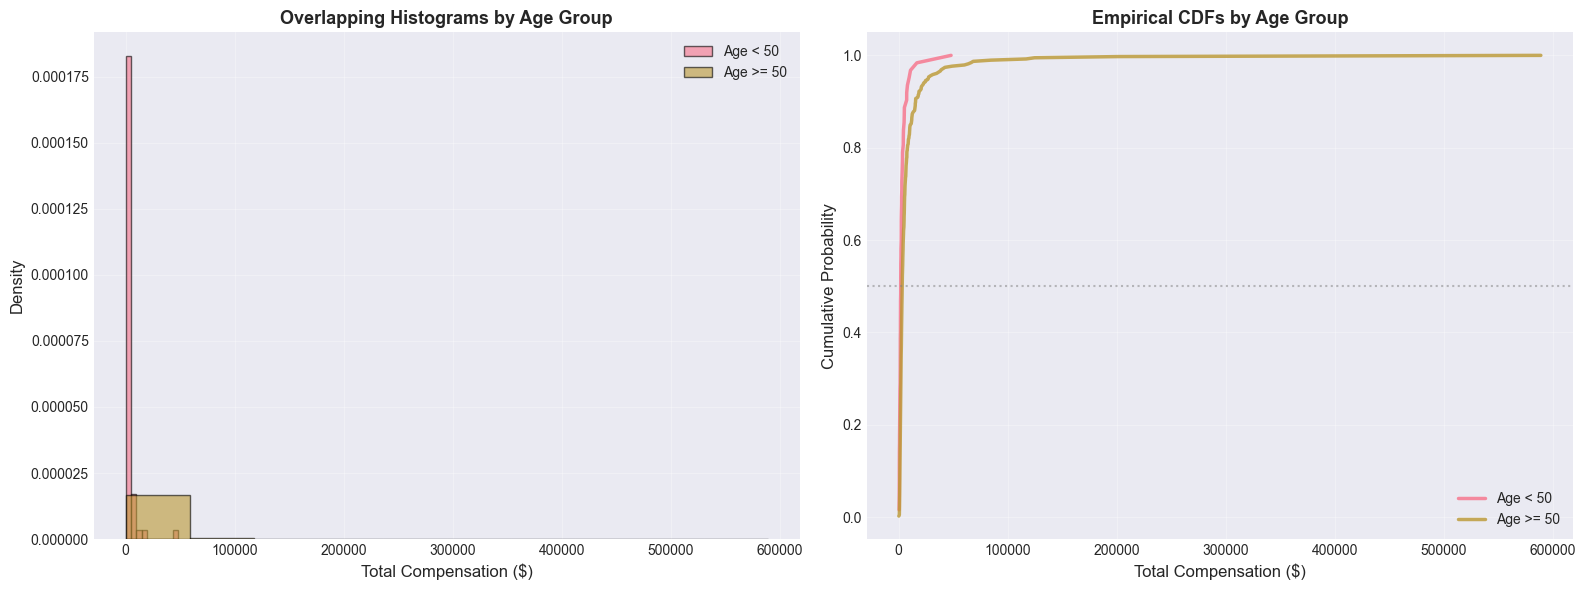

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Overlapping histograms
axes[0].hist(younger, alpha=0.6, label='Age < 50', edgecolor='black', density=True)
axes[0].hist(older, alpha=0.6, label='Age >= 50', edgecolor='black', density=True)
axes[0].set_xlabel('Total Compensation ($)', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_title('Overlapping Histograms by Age Group', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Overlapping ECDFs
sorted_younger = np.sort(younger)
sorted_older = np.sort(older)
ecdf_younger = np.arange(1, len(sorted_younger) + 1) / len(sorted_younger)
ecdf_older = np.arange(1, len(sorted_older) + 1) / len(sorted_older)

axes[1].plot(sorted_younger, ecdf_younger, linewidth=2.5, label='Age < 50', alpha=0.8)
axes[1].plot(sorted_older, ecdf_older, linewidth=2.5, label='Age >= 50', alpha=0.8)
axes[1].axhline(0.5, color='gray', linestyle=':', alpha=0.5)
axes[1].set_xlabel('Total Compensation ($)', fontsize=12)
axes[1].set_ylabel('Cumulative Probability', fontsize=12)
axes[1].set_title('Empirical CDFs by Age Group', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [62]:
print(f"SUBSAMPLE SIZES\n" + "="*50)
print(f"Age < 50:  n = {len(younger)}")
print(f"Age >= 50: n = {len(older)}")


# Summary statistics in a clean table
stats_comparison = pd.DataFrame({
    'Age < 50': [
        younger.mean(),
        younger.median(),
        younger.std(),
        younger.quantile(0.25),
        younger.quantile(0.75),
        younger.quantile(0.75) - younger.quantile(0.25),
        younger.std() / younger.mean(),
        younger.min(),
        younger.max()
    ],
    'Age >= 50': [
        older.mean(),
        older.median(),
        older.std(),
        older.quantile(0.25),
        older.quantile(0.75),
        older.quantile(0.75) - older.quantile(0.25),
        older.std() / older.mean(),
        older.min(),
        older.max()
    ]
}, index=['Mean', 'Median', 'Std Dev', 'Q1', 'Q3', 'IQR', 'CV', 'Min', 'Max'])

print("\n\nDESCRIPTIVE STATISTICS\n" + "="*50)
print(stats_comparison.round(2))
print(f"\n\nMean Difference: ${stats_comparison.loc['Mean', 'Age >= 50'] - stats_comparison.loc['Mean', 'Age < 50']:.2f}")
print(f"Median Difference: ${stats_comparison.loc['Median', 'Age >= 50'] - stats_comparison.loc['Median', 'Age < 50']:.2f}")

SUBSAMPLE SIZES
Age < 50:  n = 62
Age >= 50: n = 385


DESCRIPTIVE STATISTICS
         Age < 50  Age >= 50
Mean      3459.85    9125.96
Median    1819.00    3161.00
Std Dev   6416.93   33863.12
Q1        1067.75    1679.00
Q3        3235.00    6537.00
IQR       2167.25    4858.00
CV           1.85       3.71
Min        341.00     100.00
Max      48018.00  589101.00


Mean Difference: $5666.11
Median Difference: $1342.00


### Discussion:

**From Histograms:**
- Both distributions are heavily right-skewed with most CEOs concentrated at lower compensations
- The histogram shows the density issue - younger CEOs' distribution is barely visible because they're vastly outnumbered (62 vs 385)
- The extreme concentration at low values with long right tails confirms the skewness

**From ECDFs:**
- The curves are nearly parallel but separated vertically
- At every percentile, older CEOs earn more
- The ECDF shows that ~50% of both groups earn relatively modest compensation (below $3,200K)
- The remaining 50% shows where the major differences occur
- Both curves rise steeply initially (many low earners) then flatten (few high earners)

**Economic Interpretations:**
1. **Experience premium:** Older CEOs command higher compensation, likely due to accumulated experience, reputation, and track record

2. **Winner-takes-all among older CEOs:** The massive dispersion (CV=3.71) in the older group suggests a stratified market where superstar older CEOs earn extraordinarily high amounts while others earn moderately

3. **More homogeneous younger CEOs:** Lower CV (1.85) suggests younger CEOs have more similar compensation packages, possibly because they haven't yet differentiated themselves

4. **Sample size effect:** With only 62 younger CEOs vs 385 older ones, the younger group may not capture the full range of compensation possibilities

## 3(a) Contingency Table Analysis

In [39]:
df_clean = df[['salary', 'age']].dropna()

df_clean['S'] = pd.cut(df_clean['salary'], 
                        bins=[-np.inf, 3000, 5000, np.inf],
                        labels=['S1', 'S2', 'S3'])

df_clean['A'] = pd.cut(df_clean['age'],
                       bins=[-np.inf, 50, np.inf],
                       labels=['A1', 'A2'])

contingency_absolute = pd.crosstab(df_clean['A'], df_clean['S'], margins=True)
contingency_relative = pd.crosstab(df_clean['A'], df_clean['S'], normalize=True, margins=True)

print("CONTINGENCY TABLE - ABSOLUTE FREQUENCIES\n" + "="*60)
print(contingency_absolute)
print("\n\nCONTINGENCY TABLE - RELATIVE FREQUENCIES\n" + "="*60)
print(contingency_relative.round(4))

CONTINGENCY TABLE - ABSOLUTE FREQUENCIES
S     S1  S2  S3  All
A                    
A1    75   3   0   78
A2   309  36  24  369
All  384  39  24  447


CONTINGENCY TABLE - RELATIVE FREQUENCIES
S        S1      S2      S3     All
A                                  
A1   0.1678  0.0067  0.0000  0.1745
A2   0.6913  0.0805  0.0537  0.8255
All  0.8591  0.0872  0.0537  1.0000


## 3(b) Interpretation of Table Values

$n_{12} = 3$\
Interpretation: 3 CEOs are younger than 50 AND have salary between $3000-5000K

$h_{12} = 0.0067$\
Interpretation: 0.67% of all CEOs are younger than 50 AND earn $3000-5000K

$n_{1*} = 78$\
Interpretation: Total number of CEOs younger than 50 (marginal frequency)

$h_{1*} = 0.1745$\
Interpretation: 17.45% of all CEOs are younger than 50 (marginal proportion)

## 3(c) Dependence Measure

In [68]:
contingency_no_margins = pd.crosstab(df_clean['A'], df_clean['S'])

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_no_margins)

n_total = contingency_no_margins.sum().sum()
cramers_v = np.sqrt(chi2 / (n_total * (min(contingency_no_margins.shape) - 1)))

print("DEPENDENCE ANALYSIS\n" + "="*60)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Cramér's V: {cramers_v:.4f}")

print(f"\nINTERPRETATION:")
if p_value < 0.05:
    print("✓ Variables are statistically dependent (p < 0.05)")
else:
    print("✗ No significant dependence detected (p >= 0.05)")

if cramers_v < 0.1:
    strength = "negligible"
elif cramers_v < 0.3:
    strength = "weak"
elif cramers_v < 0.5:
    strength = "moderate"
else:
    strength = "strong"

print(f"Cramér's V indicates {strength} association between age and salary groups")

DEPENDENCE ANALYSIS
Chi-square statistic: 8.8059
p-value: 0.0122
Degrees of freedom: 2
Cramér's V: 0.1404

INTERPRETATION:
✓ Variables are statistically dependent (p < 0.05)
Cramér's V indicates weak association between age and salary groups


### What Can We Infer?

**About Co-movement**:
- Cramér's V measures strength of association (0 = independent, 1 = perfect)
- Cannot determine direction (positive/negative) from chi-square test
- Shows whether knowing age helps predict salary category

**About Opposite Directions**:
- Chi-square test does NOT measure direction of relationship
- Need to examine conditional probabilities or odds ratios for direction
- For nominal variables like these categories, "opposite direction" is not well-defined

**Better approach for direction**:
- Compare P(high salary | older) vs P(high salary | younger)
- Examine the standardized residuals from chi-square test
- Use conditional probability tables

In [69]:
conditional_probs = pd.crosstab(df_clean['A'], df_clean['S'], normalize='index')

print("\nCONDITIONAL PROBABILITIES (Row Percentages)\n" + "="*60)
print("P(Salary Category | Age Group):\n")
print(conditional_probs.round(4))

print("\nINTERPRETATION:")
print("Each row shows the distribution of salary categories within that age group.")
print("This helps us understand: Do older CEOs have different salary distributions?")


CONDITIONAL PROBABILITIES (Row Percentages)
P(Salary Category | Age Group):

S       S1      S2     S3
A                        
A1  0.9615  0.0385  0.000
A2  0.8374  0.0976  0.065

INTERPRETATION:
Each row shows the distribution of salary categories within that age group.
This helps us understand: Do older CEOs have different salary distributions?


## Summary and Conclusions

This analysis revealed several key insights about CEO compensation:

1. **Distribution**: Highly right-skewed with significant outliers
2. **Central Tendency**: Median more appropriate than mean due to skewness
3. **Transformation**: Log transformation normalizes distribution
4. **Correlations**: Company size metrics strongly correlate with compensation
5. **Age Effects**: Differences exist between age groups in both location and spread
6. **Categorical Relationships**: Salary and age categories show measurable association